## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?

Ho : switching service providers will drop latency or stay the same


Ha : the network latency has increased with the new internet provider

True negative: the new internet provider has not increased latency

True Positive: the new internet provider has increased latency

False positive (type1): the new internet states that the latency has increased but the current status is a decrease in latency

False Negative (type2) - (double negative): the new internet states that the latency has decreased but the current status is a increase in latency


## Is the website redesign any good?
- Has traffic increased?


Ho : website traffic has decreased or no change since the new website design

Ha: website traffic has increased since the new website deisgn

True Negative: the new website has seen a decrease in traffic 

True Positive: the new website has seen an increase in traffoc

False Positive(type1): the website claims that traffic has increased but the reality is there is no change or it has decreased since the new redesign


False Negative(type2): the website claims that the traffic has decreased but the reality is that there is an increase in the traffic since the redesign

## Is our television ad driving more sales?
- has revenue increased?

Ho : the television ad did not drive more sales or they stayed the same

Ha: the television add increased sales and revenue

True Negative: sales have decreased or remained the same since the new telvision ad

True Positive : sales have increased since the new telvision ad

False Positive (type1): the sales seem to increase but reality is that they decreased or remained the same.

False Negative (type2): The sales seem to have decreased but reality is that they increased from the new television ad

In [1]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics

alpha = 0.05

## Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
#office 1
#40 sales, mean 90, std 15

#office 2
#50 sales, mean 100, std 20
#.05 alpha


H0 = the mean it takes to sell for office 1 == the mean it tajes to sell office 2

HA = the mean it takes to sell for office 1 != the mean it takes for office 2

In [3]:
#(mean, std, trials)
office_1 = np.random.normal(90, 15, 40)
office_1


array([ 70.27661729,  84.46954392,  99.60595877,  94.85352744,
       102.89816911,  85.10277192, 114.92166232,  86.05330838,
        85.46422343,  96.84935056,  95.55566391,  83.4644638 ,
        83.58961184,  58.89388568,  63.33132089,  93.27213675,
       119.75634302, 113.08729053,  97.75011468, 112.41363986,
        72.1500921 ,  87.95509576, 109.47418102, 114.2490006 ,
        64.55339508,  95.48330071,  68.77596309, 104.6284634 ,
        57.37250607,  85.52186767, 101.09462816,  70.46051053,
        91.55260092,  92.18489484,  83.98627068,  47.38317539,
        81.29325765,  95.19879035,  89.54669706, 100.30865766])

In [4]:

office_2 = np.random.normal(100, 20, 50)
office_2

array([102.0370101 ,  92.22585481, 106.11078092,  59.56855959,
       110.72914714, 105.71319922, 109.16239613, 103.19173014,
        97.75009878, 104.55097936,  99.38558112,  98.24066167,
       126.18965562,  60.47773118, 147.9594676 , 109.82133708,
       128.09514265,  64.84650946, 139.23749766,  88.88341135,
       136.61645282, 123.87080222, 107.36441917, 122.33198923,
        90.29540629, 126.42378243, 111.35750536, 104.97711643,
        96.89486353,  91.35763016,  97.71171431, 116.39593272,
        74.6026867 , 140.94540782, 104.96947327, 122.48205348,
       107.94553172,  99.4160849 ,  54.69526003, 132.61480414,
       107.49754676, 108.08659457, 138.53943089,  84.10298204,
       108.92668294,  96.4296008 ,  97.31179141, 102.77805516,
        67.4003485 ,  99.96425514])

In [5]:
#Independent T-Test & asking for difference
alpha = .05

In [6]:
t, p = stats.ttest_ind(office_1, office_2, equal_var = False)
t, p, alpha

(-3.8800073032513707, 0.00020126845865018093, 0.05)

In [7]:
p < alpha

True

In [8]:
if (p < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


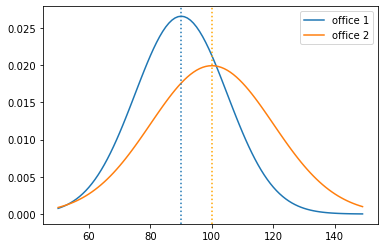

In [9]:
#Ravinder's - Visualize two distributions:

# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

In [10]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var= False)
t,p

(-2.7091418459143854, 0.00811206270346016)

### Using the ind_from_stats method is a more accurate means rather than just generating random numbers via an array.   

## Load the mpg dataset and use it to answer the following questions:

In [11]:
df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


H0 = mean amount of fuel efficiency 2008 cars == mean amount of fuel efficiency 1999 cars
HA = mean amount of fuel efficiency 2008 cars != mean amount of fuel efficiency 1999 cars

In [12]:
df['fuel_efficiency'] = ((df.cty + df.hwy)/2)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [13]:
cars_2008 = df[df.year == 2008].fuel_efficiency
cars_1999 = df[df.year == 1999].fuel_efficiency

In [14]:
cars_2008.var(), cars_1999.var()

(24.097480106100797, 27.122605363984682)

<AxesSubplot:>

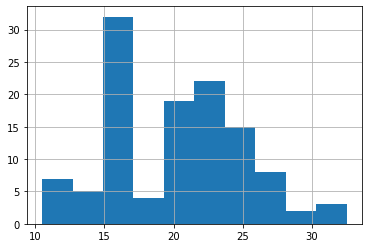

In [15]:
cars_2008.hist()

<AxesSubplot:>

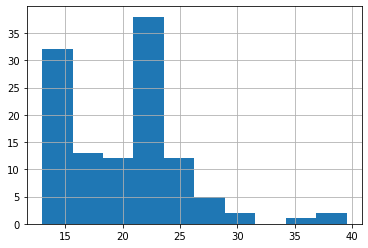

In [16]:
cars_1999.hist()

In [17]:
t, p = stats.ttest_ind(cars_2008, cars_1999)
t, p, alpha

(-0.21960177245940962, 0.8263744040323578, 0.05)

In [18]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Are compact cars more fuel-efficient than the average car?


H0 : compact cars fuel efficiency <= average cars fuel efficiency

HA : compact cars fuel efficiency > average cars fuel efficiency

In [19]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [20]:
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [21]:
compact_cars = df[df['class'] == 'compact'].fuel_efficiency


<AxesSubplot:>

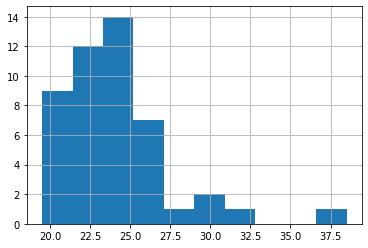

In [22]:
compact_cars.hist()

In [23]:
compact_cars.mean()

24.21276595744681

In [24]:
compact_mean = compact_cars.mean()
compact_mean

24.21276595744681

In [25]:
compact_cars.describe()

count    47.000000
mean     24.212766
std       3.527446
min      19.500000
25%      22.000000
50%      23.500000
75%      25.250000
max      38.500000
Name: fuel_efficiency, dtype: float64

In [26]:
average_car = df['fuel_efficiency']
average_car

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: fuel_efficiency, Length: 234, dtype: float64

In [27]:
t, p = stats.ttest_1samp(compact_cars, average_car.mean())
t, p/2, alpha

(7.896888573132535, 2.0992818971585668e-10, 0.05)

In [28]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Do manual cars get better gas mileage than automatic cars?

In [29]:
automatic = df[df['trans'].str.contains("auto")]
manual = df[df['trans'].str.contains("manual")]

<AxesSubplot:>

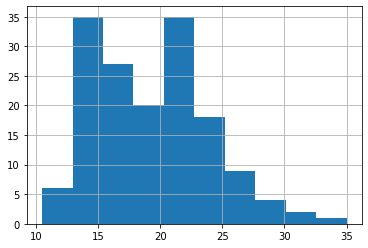

In [30]:
automatic['fuel_efficiency'].hist()

<AxesSubplot:>

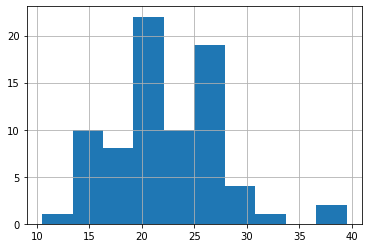

In [31]:
manual['fuel_efficiency'].hist()

In [32]:
automatic.fuel_efficiency.var()

21.942777233382337

In [33]:
manual.fuel_efficiency.var()

26.635167464114826

In [34]:
t, p = stats.ttest_ind(manual.fuel_efficiency, automatic.fuel_efficiency, equal_var = True)
t, p

(4.593437735750014, 7.154374401145683e-06)

In [35]:
p = p/2
p

3.5771872005728416e-06

In [36]:
t

4.593437735750014

In [37]:
if (p < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [38]:
df = pd.read_csv("Telco_Churn.csv")
telco_churn = pd.DataFrame(df)
telco_churn = telco_churn.dropna()
telco_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [39]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Does Tenure correlate with Monthly Charges

H0 : There is no correlation between tenure and monthly charges

HA: There is a correlation between tenure and monthly charges

<AxesSubplot:>

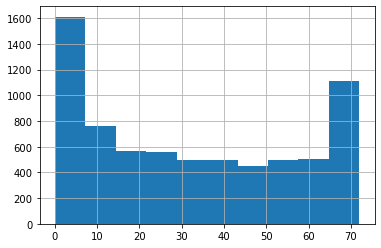

In [40]:
telco_churn['tenure'].hist()

<AxesSubplot:>

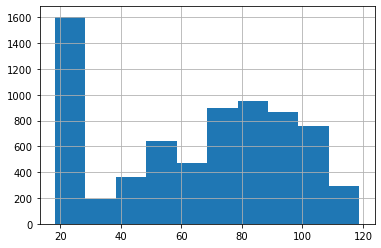

In [41]:
telco_churn['MonthlyCharges'].hist()

In [42]:
telco_churn['tenure'].var(), telco_churn['MonthlyCharges'].var()

(603.1681081237256, 905.4109343405128)

In [43]:
x= telco_churn['tenure']
y= telco_churn['MonthlyCharges']
alpha = 0.05

corr, p = stats.pearsonr(x, y)
corr, p

(0.2478998562861525, 4.094044991483017e-99)

In [44]:
p < alpha

True

In [45]:
if p < alpha:
    print("We are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

We are rejecting our Null Hypothesis


## Does tenure correlate with total charges?

H0: There is no correlation between tenure and total charges

HA: There is a correlation between tenure and monthly charges

<AxesSubplot:>

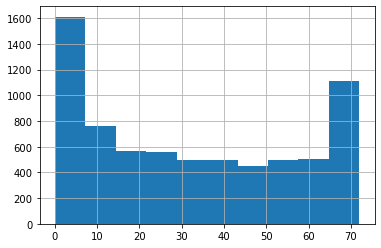

In [46]:
telco_churn['tenure'].hist()

In [47]:
#telco_churn['TotalCharges'].sort_values()

telco_churn = telco_churn.dropna()
telco_churn
#drop 11 values out of the 7000

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [48]:
#1) start here df.total_charges = df.total_charges.str.strip()
# Then 2) df = df[df.total_charges != ""]
# Finally 3) df.total_charges = df.total_charges.astype(float)

#Ryan's help:

1) start here df.total_charges = df.total_charges.str.strip()

Then 2) df = df[df.total_charges != ""]

 Finally 3) df.total_charges = df.total_charges.astype(float)

In [49]:
# Joshua
# telco_churn['TotalCharges'] = telco_churn.TotalCharges.str.strip().str.replace(['', np.inf, -np.inf], np.nan).dropna()

In [53]:
 telco_churn.TotalCharges = telco_churn.TotalCharges.str.strip()

In [54]:
telco_churn = telco_churn[telco_churn['TotalCharges'] != '']

In [55]:
telco_churn['TotalCharges'] = telco_churn['TotalCharges'].astype(float)

<ipython-input-55-50a778943f58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco_churn['TotalCharges'] = telco_churn['TotalCharges'].astype(float)


In [56]:
len(telco_churn)

7032

In [57]:
telco_churn['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
6424.70     1
1474.35     1
6668.35     1
6096.90     1
5867.00     1
Name: TotalCharges, Length: 6530, dtype: int64

<AxesSubplot:>

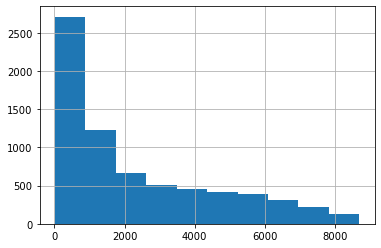

In [58]:
telco_churn['TotalCharges'].hist()

In [59]:
telco_churn['TotalCharges'].var()

5138252.40705357

In [60]:
x= telco_churn['tenure']
y= telco_churn['MonthlyCharges']
alpha = 0.05

corr, p = stats.pearsonr(telco_churn['tenure'], telco_churn['TotalCharges'])
corr, p

(0.8258804609332093, 0.0)

In [61]:
if p < alpha:
    print("We are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

We are rejecting our Null Hypothesis


### What happens if you control for phone and Total Charges?

Ho = Tenure with phone service does not correlate with Total Charges

Ha = Tenure with phone service does correlate with Total Charges

In [63]:
no_phone = telco_churn[telco_churn.PhoneService == "No"]
phone_cust = telco_churn[telco_churn.PhoneService == "Yes"]
#tenure and totalcharges with no phone
totalcharges_nophone = no_phone['tenure']
tenure_nophone = no_phone['TotalCharges']

In [64]:
corr, p = stats.pearsonr(tenure_nophone, totalcharges_nophone)
corr, p

(0.9534228506954507, 0.0)

In [65]:
if p < alpha:
    print("We are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

We are rejecting our Null Hypothesis


### What happens if you control for internet and Total Charges?


Ho = Tenure with internet does not correlate with Total Charges

Ha = Tenure with internet does correlate with Total Charges

In [66]:
#Tenure vs. Internet Service
telco_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [67]:
telco_internet = telco_churn[telco_churn.InternetService != "No"]
no_internet = telco_churn[telco_churn.InternetService == "No"]

In [68]:
totalcharges_internet = telco_internet['TotalCharges']
tenure_internet = telco_internet['tenure']

In [69]:
corr, p = stats.pearsonr(tenure_internet, totalcharges_internet)
corr, p

(0.931934618741813, 0.0)

In [70]:
if p < alpha:
    print("We are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

We are rejecting our Null Hypothesis


### No Internet

Ho = Tenure with NO internet does not correlate with Total Charges

Ha = Tenure with NO internet does correlate with Total Charges

In [71]:
totalcharges_no_internet = no_internet['TotalCharges']
tenure_no_internet = no_internet['tenure']

corr, p = stats.pearsonr(tenure_no_internet, totalcharges_no_internet)
corr, p

(0.9814648859044319, 0.0)

In [72]:
if p < alpha:
    print("We are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

We are rejecting our Null Hypothesis


### Review The Class Code For Comparision

### 2. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [79]:
from env import host, user, password


In [80]:
def get_db_url(user,password,host,database):
    return (f"mysql+pymysql://{user}:{password}@{host}/{database}")


In [81]:
url = get_db_url(user,password,host,database = "employees")


In [105]:
query = '''
SELECT employees.emp_no, hire_date, salary, to_date
FROM employees
JOIN salaries using (emp_no)
Where to_date > curdate()
;
'''
df = pd.read_sql(query,url)
df.head()



,emp_no,hire_date,salary,to_date
0,10001,1986-06-26,88958,9999-01-01
1,10002,1985-11-21,72527,9999-01-01
2,10003,1986-08-28,43311,9999-01-01
3,10004,1986-12-01,74057,9999-01-01
4,10005,1989-09-12,94692,9999-01-01


### - Is there a relationship between how long an employee has been with the company and their salary?

In [ ]:
df.info()

In [ ]:
# I need to create a new column for "tenure"

##Using SQL I figured out that the last to_date is 2002-08-01
## Let's create an arbitrary date of 2003-01-01 as our end date for data
## the current date of this code might represent the date properly

In [83]:
df['to_date'].value_counts()
#we need to sub the dates for a new value determine as 2003-01-01

9999-01-01    240124
Name: to_date, dtype: int64

In [84]:
#change type from int to str
df['to_date'] = df['to_date'].astype("str")

In [85]:
df['fixed_date'] = df['to_date'].apply(lambda x: x.replace("9999-01-01", "2003-01-01"))

df['fixed_date']

0         2003-01-01
1         2003-01-01
2         2003-01-01
3         2003-01-01
4         2003-01-01
             ...    
240119    2003-01-01
240120    2003-01-01
240121    2003-01-01
240122    2003-01-01
240123    2003-01-01
Name: fixed_date, Length: 240124, dtype: object

In [86]:
df.head()
#now we need a tenure column

,emp_no,hire_date,salary,to_date,fixed_date
0,10001,1986-06-26,88958,9999-01-01,2003-01-01
1,10002,1985-11-21,72527,9999-01-01,2003-01-01
2,10003,1986-08-28,43311,9999-01-01,2003-01-01
3,10004,1986-12-01,74057,9999-01-01,2003-01-01
4,10005,1989-09-12,94692,9999-01-01,2003-01-01


In [87]:
from datetime import date

In [88]:
df['fixed_date'].describe()

count         240124
unique             1
top       2003-01-01
freq          240124
Name: fixed_date, dtype: object

In [89]:
df['fixex_date'] = pd.to_datetime(df.fixed_date)
df

,emp_no,hire_date,salary,to_date,fixed_date,fixex_date
0,10001,1986-06-26,88958,9999-01-01,2003-01-01,2003-01-01
1,10002,1985-11-21,72527,9999-01-01,2003-01-01,2003-01-01
2,10003,1986-08-28,43311,9999-01-01,2003-01-01,2003-01-01
3,10004,1986-12-01,74057,9999-01-01,2003-01-01,2003-01-01
4,10005,1989-09-12,94692,9999-01-01,2003-01-01,2003-01-01
...,...,...,...,...,...,...
240119,499995,1993-01-12,52868,9999-01-01,2003-01-01,2003-01-01
240120,499996,1990-09-27,69501,9999-01-01,2003-01-01,2003-01-01
240121,499997,1986-04-21,83441,9999-01-01,2003-01-01,2003-01-01
240122,499998,1993-10-13,55003,9999-01-01,2003-01-01,2003-01-01


In [90]:
df.rename(columns = {'fixex_date': "fixed_to_date"})
df['fixed_hire_date'] = pd.to_datetime(df.hire_date)
df.head(1)

,emp_no,hire_date,salary,to_date,fixed_date,fixex_date,fixed_hire_date
0,10001,1986-06-26,88958,9999-01-01,2003-01-01,2003-01-01,1986-06-26


In [91]:
df['tenure'] = (df['fixex_date'] - df['fixed_hire_date'])
df.head(1)

,emp_no,hire_date,salary,to_date,fixed_date,fixex_date,fixed_hire_date,tenure
0,10001,1986-06-26,88958,9999-01-01,2003-01-01,2003-01-01,1986-06-26,6033 days


In [92]:
###FINALLY!!!!
#we have tenure and salary

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   emp_no           240124 non-null  int64          
 1   hire_date        240124 non-null  object         
 2   salary           240124 non-null  int64          
 3   to_date          240124 non-null  object         
 4   fixed_date       240124 non-null  object         
 5   fixex_date       240124 non-null  datetime64[ns] 
 6   fixed_hire_date  240124 non-null  datetime64[ns] 
 7   tenure           240124 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), object(3), timedelta64[ns](1)
memory usage: 14.7+ MB


In [94]:
df['tenure'] = df['tenure'].dt.days

In [95]:
corr, p =stats.pearsonr(df['tenure'], df['salary'])
corr, p

(0.30646256131860894, 0.0)

In [96]:
if p < alpha:
    print("We are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

We are rejecting our Null Hypothesis


### Adam's Code:

In [100]:
def get_db_url(user,password,host,database):
    '''get a url from input user, password, host and database'''
    
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
conn = get_db_url(user, password, host, "employees")

In [101]:
sql = """
select datediff(curdate(), hire_date) as days_on_job, salary
from employees
join salaries using(emp_no)
where to_date > curdate();
"""

In [102]:

df = pd.read_sql(sql, conn)
df.head(3)

,days_on_job,salary
0,12920,88958
1,13137,72527
2,12857,43311


In [103]:
lpha = 0.05
corr, p = stats.pearsonr(df.days_on_job, df.salary)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation


(0.30646256131860894, 0.0)

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [106]:
title_counts = df.emp_no.value_counts()
title_counts

14343     1
36027     1
13484     1
15533     1
11439     1
         ..
215612    1
213565    1
219710    1
217663    1
10235     1
Name: emp_no, Length: 240124, dtype: int64

In [107]:
title_counts = df.groupby(['emp_no']).count()
title_counts 


,hire_date,salary,to_date
emp_no,,,
10001,1,1,1
10002,1,1,1
10003,1,1,1
10004,1,1,1
10005,1,1,1
...,...,...,...
499995,1,1,1
499996,1,1,1
499997,1,1,1


In [108]:
df

,emp_no,hire_date,salary,to_date
0,10001,1986-06-26,88958,9999-01-01
1,10002,1985-11-21,72527,9999-01-01
2,10003,1986-08-28,43311,9999-01-01
3,10004,1986-12-01,74057,9999-01-01
4,10005,1989-09-12,94692,9999-01-01
...,...,...,...,...
240119,499995,1993-01-12,52868,9999-01-01
240120,499996,1990-09-27,69501,9999-01-01
240121,499997,1986-04-21,83441,9999-01-01
240122,499998,1993-10-13,55003,9999-01-01


In [ ]:
# df = df.merge(title_counts, how = 'inner', on = 'emp_no')
# df

In [109]:
#using tenure code:
df['to_date'] = df['to_date'].astype("str")
df['fixed_date'] = df['to_date'].apply(lambda x: x.replace("9999-01-01", "2003-01-01"))
df['fixed_date'] = pd.to_datetime(df.fixed_date)
df['fixed_hire_date'] = pd.to_datetime(df.hire_date)
df['tenure'] = (df['fixed_date'] - df['fixed_hire_date'])
df.head(3)


,emp_no,hire_date,salary,to_date,fixed_date,fixed_hire_date,tenure
0,10001,1986-06-26,88958,9999-01-01,2003-01-01,1986-06-26,6033 days
1,10002,1985-11-21,72527,9999-01-01,2003-01-01,1985-11-21,6250 days
2,10003,1986-08-28,43311,9999-01-01,2003-01-01,1986-08-28,5970 days


In [112]:
r, p = stats.pearsonr(df.tenure, df.emp_no)
r, p
#code did not work

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('float64') and dtype('<m8[ns]')

### Adam's Code

$H_o$: There is no linear correlation between tenure and number of titles

$H_a$: There is a linear correlation between tenure and number of titles


In [113]:
sql = """
select emp_no, count(title) as title_count, datediff(curdate(), hire_date) as days_on_job
from employees
join titles using(emp_no)
group by emp_no;
"""


In [114]:

df = pd.read_sql(sql, conn)
df.head()

,emp_no,title_count,days_on_job
0,10001,1,12920
1,10002,1,13137
2,10003,1,12857
3,10004,2,12762
4,10005,2,11746


In [115]:
corr, p = stats.pearsonr(df.days_on_job, df.title_count)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation between tenure and number of titles")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation between tenure and number of titles


(0.2665989299136427, 0.0)

### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [116]:
from pydataset import data
sleepstudy = data("sleepstudy")
sleepstudy.head()


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [117]:
r, p = stats.pearsonr(sleepstudy['Days'], sleepstudy['Reaction'])
r, p

(0.5352302262650253, 9.894096322214812e-15)

In [118]:
if p < alpha:
    print("We are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

We are rejecting our Null Hypothesis


In [119]:
sns.relplot(x =sleepstudy['Days'], y= sleepstudy['Reaction'] )

NameError: name 'sns' is not defined

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

H0: Macbook usage is independent of being a codeup student

HA: Macbook usage is not independent of being a codeup student

In [120]:
index = ['Mac', 'Not_Mac']
columns= ['Code_Up_Student', 'Not_Codeup_Student']
observed = pd.DataFrame([[49, 1], [20, 30]], index=index, columns=columns)

observed

,Code_Up_Student,Not_Codeup_Student
Mac,49,1
Not_Mac,20,30


In [121]:
chi2,p,degf,expected = stats.chi2_contingency(observed)
chi2,p,degf,expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 15.5],
        [34.5, 15.5]]))

In [122]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49  1]
 [20 30]]
---
Expected

[[34 15]
 [34 15]]
---

chi^2 = 36.6526
p     = 0.0000


In [123]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis


### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

HO: there is no association between transmission type and if a car is made in either 1999 or 2008

HA: there is an association between transmission type and if a car is made in either 1999 or 2008

In [135]:
mpg = data("mpg")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [136]:
mpg['manufacturer'].value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
mercury        4
land rover     4
lincoln        3
Name: manufacturer, dtype: int64

In [137]:
mpg['year'].value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [138]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Automatic', 'Manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,Automatic
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,Manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,Manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,Automatic
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,Automatic


In [139]:
observed = pd.crosstab(mpg.year, mpg.transmission_type)
observed

transmission_type,Automatic,Manual
year,,
1999,74,43
2008,83,34


In [140]:
chi2,p,degf,expected = stats.chi2_contingency(observed)
chi2,p,degf,expected

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[74 43]
 [83 34]]
---
Expected

[[78 38]
 [78 38]]
---

chi^2 = 1.2388
p     = 0.2657


In [141]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### 3. Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

Ho: There is no association between gender and department(sales or marketing)

Ha: There is an association between gender and department(sales or marketing)

In [142]:
query = '''SELECT emp_no,gender, dept_name 
FROM employees
JOIN dept_emp USING (emp_no)
JOIN departments USING (dept_no)
Where to_date > curdate()
ORDER BY emp_no;
'''
employees = pd.read_sql(query,url)
employees.head()

,emp_no,gender,dept_name
0,10001,M,Development
1,10002,F,Sales
2,10003,M,Production
3,10004,M,Production
4,10005,M,Human Resources


In [143]:
employees['dept_name'].value_counts()

Development           61386
Production            53304
Sales                 37701
Customer Service      17569
Research              15441
Marketing             14842
Quality Management    14546
Human Resources       12898
Finance               12437
Name: dept_name, dtype: int64

In [144]:
employees = employees[(employees.dept_name == 'Sales') | (employees.dept_name == 'Marketing')]
employees

,emp_no,gender,dept_name
1,10002,F,Sales
12,10016,M,Sales
13,10017,F,Marketing
32,10041,F,Sales
39,10050,M,Sales
...,...,...,...
240105,499976,M,Sales
240108,499980,M,Sales
240113,499986,F,Sales
240114,499987,F,Sales


In [145]:
employees['gender'].value_counts()

M    31680
F    20863
Name: gender, dtype: int64

In [146]:
employees['dept_name'].value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [147]:
observed = pd.crosstab(employees['gender'], employees['dept_name'])
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [148]:
chi2,p,degf,expected = stats.chi2_contingency(observed)
chi2,p,degf,expected

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893 14969]
 [ 8948 22731]]
---

chi^2 = 0.3240
p     = 0.5692


In [149]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Is an employee's gender independent of whether or not they are or have been a manager?

Ho: There is no association between gender and whether or not they are/have been a manager

Ha: There is an association between gender and whether or not they are/have been a manager

In [156]:
query = '''SELECT emp_no, gender, dept_no, dept_name
FROM employees
JOIN dept_manager USING (emp_no)
JOIN departments USING (dept_no);
'''
employees = pd.read_sql(query,url)
employees.head()

,emp_no,gender,dept_no,dept_name
0,111692,F,d009,Customer Service
1,111784,F,d009,Customer Service
2,111877,F,d009,Customer Service
3,111939,M,d009,Customer Service
4,110511,M,d005,Development


In [159]:
employees['dept_name'].value_counts()

Production            4
Customer Service      4
Quality Management    4
Finance               2
Research              2
Marketing             2
Development           2
Human Resources       2
Sales                 2
Name: dept_name, dtype: int64

In [163]:
#code from class
employees['Manager'] = employees.dept_no.notna()
print(employees.Manager.value_counts())
employees.head()


##Why does it not show False?

True    24
Name: Manager, dtype: int64


,emp_no,gender,dept_no,dept_name,Manager
0,111692,F,d009,Customer Service,True
1,111784,F,d009,Customer Service,True
2,111877,F,d009,Customer Service,True
3,111939,M,d009,Customer Service,True
4,110511,M,d005,Development,True


In [164]:
observed = pd.crosstab(employees['gender'], employees['Manager'])
observed

Manager,True
gender,
F,13
M,11


In [165]:
chi2,p,degf,expected = stats.chi2_contingency(observed)
chi2,p,degf,expected

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[13]
 [11]]
---
Expected

[[13]
 [11]]
---

chi^2 = 0.0000
p     = 1.0000


In [166]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis
